In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train  = pd.read_csv('/content/drive/My Drive/kannada_mnist/train.csv')
test = pd.read_csv('/content/drive/My Drive/kannada_mnist/test.csv')

In [36]:
train.head(4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

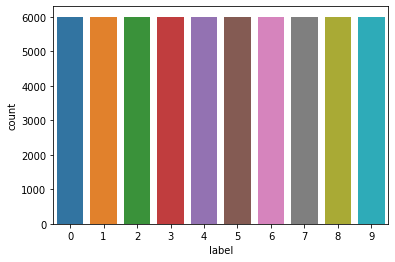

In [38]:
sns.countplot(train['label'])

In [0]:
X_train = train.drop(['label'],axis=1)
Y_train = train['label']

In [0]:
#Reshaping data


In [0]:
X_train = X_train/255.0

In [41]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
testids = test['id']

In [0]:
test.drop(['id'],axis=1,inplace=True)

In [0]:
test = test/255.0

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
Y_train = to_categorical(Y_train,num_classes=10)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,random_state=2,test_size=0.1)

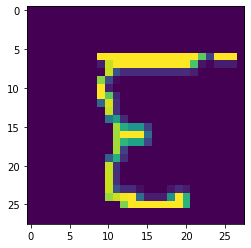

In [48]:
g = plt.imshow(X_train[0][:,:,0])

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))

model.add(BatchNormalization(momentum=.15))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',))

model.add(BatchNormalization(momentum=.15))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:

optimizer = RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [0]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#Reducing the learning rate

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lir=0.00001)

In [0]:
epochs=30
batch_size=86

In [0]:
# Data Augmentation

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=0,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

In [0]:
datagen.fit(X_train)

In [59]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_test,Y_test),
                              verbose=2,
                              steps_per_epoch=X_train.shape[0]//batch_size,
                              callbacks=[learning_rate_reduction]
                              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
 - 412s - loss: 0.3744 - acc: 0.9052 - val_loss: 0.0450 - val_acc: 0.9898
Epoch 2/30
 - 412s - loss: 0.1382 - acc: 0.9708 - val_loss: 0.0482 - val_acc: 0.9913
Epoch 3/30
 - 414s - loss: 0.1166 - acc: 0.9784 - val_loss: 0.0409 - val_acc: 0.9935
Epoch 4/30
 - 412s - loss: 0.0963 - acc: 0.9824 - val_loss: 0.0432 - val_acc: 0.9938
Epoch 5/30
 - 412s - loss: 0.0951 - acc: 0.9833 - val_loss: 0.0326 - val_acc: 0.9955
Epoch 6/30
 - 412s - loss: 0.0948 - acc: 0.9839 - val_loss: 0.0274 - val_acc: 0.9955
Epoch 7/30
 - 412s - loss: 0.0845 - acc: 0.9857 - val_loss: 0.0433 - val_acc: 0.9942
Epoch 8/30
 - 412s - loss: 0.0770 - acc: 0.9867 - val_loss: 0.0534 - val_acc: 0.9923

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/30
 - 411s - loss: 0.0642 - acc: 0.9892 - val_loss: 0.0256 - val_acc: 0.9958
Epoch 10/30
 - 411s - loss: 0.0550 - acc: 0.9903 - val_los

In [0]:
test = pd.read_csv('/content/drive/My Drive/kannada_mnist/test.csv')

In [0]:
test_id = test['id']

In [0]:
test = test.drop(['id'],axis=1)

In [0]:
test = test/255.0

In [0]:
test=test.values.reshape(test.shape[0],28,28,1)

In [89]:
test.shape

(5000, 28, 28, 1)

In [0]:

y_pre = model.predict(test)

In [0]:
y_pre = np.argmax(y_pre,axis=1)

In [0]:
sample_sub = pd.DataFrame(y_pre)

In [93]:
sample_sub.head()

,0
0,3
1,0
2,2
3,6
4,7


In [0]:
sub1 = sample_sub

In [0]:
sub1 = pd.concat([test_id,sub1],axis=1)

In [96]:
sub1.head()

,id,0
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [0]:
sub1 = sub1.rename(columns={0:'label'})

In [0]:
sub1.to_csv('submission.csv',index=False)